# Linear Regression

In [4]:
import pandas as pd
import numpy as np
#visualization lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('USA_Housing.csv')
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
df.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

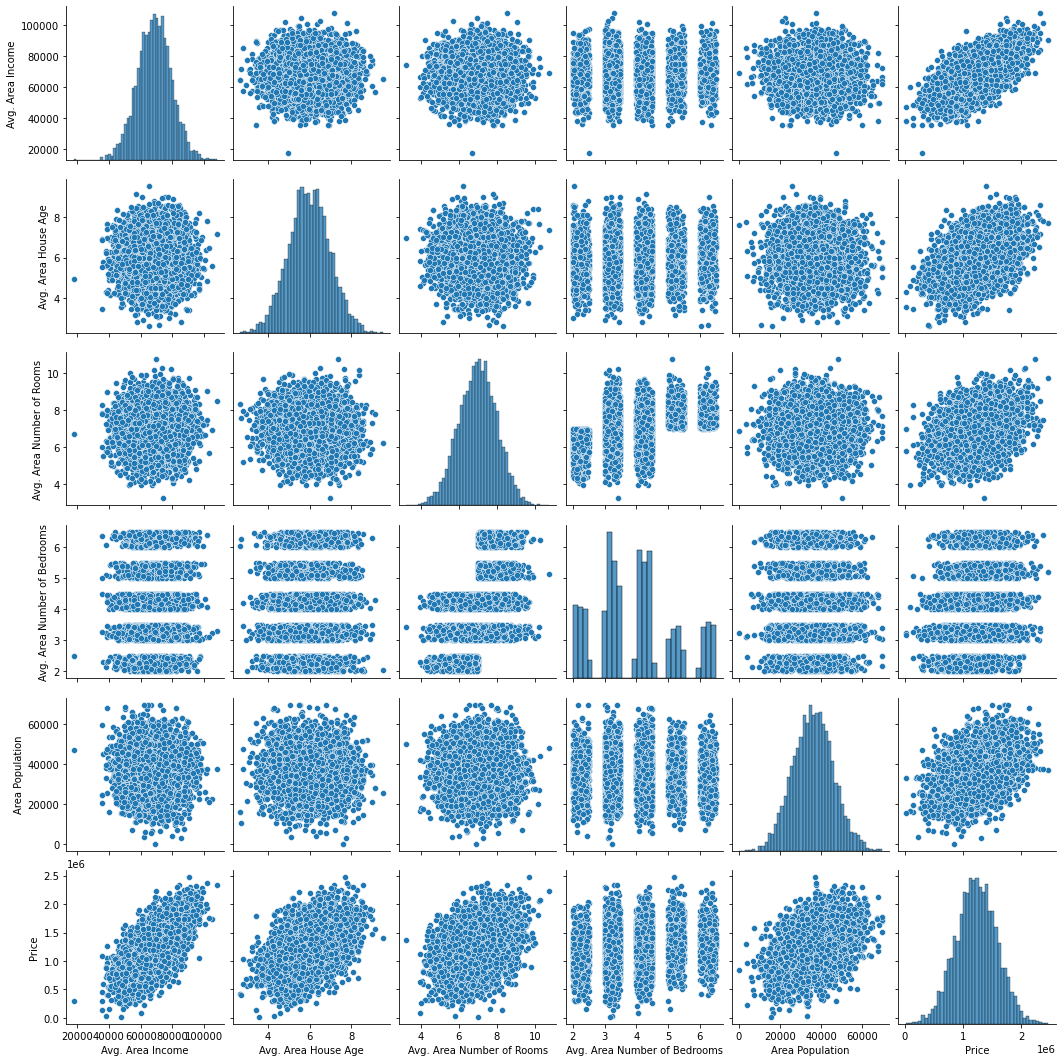

In [11]:
sns.pairplot(df)

<AxesSubplot:xlabel='Price', ylabel='Count'>

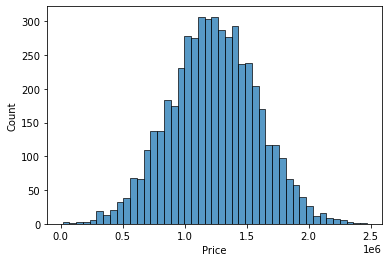

In [16]:
sns.histplot(df['Price'])

<AxesSubplot:>

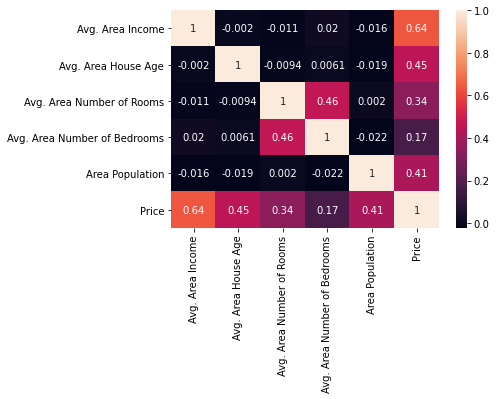

In [21]:
sns.heatmap(df.corr(),annot=True)

In [26]:
#features
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [27]:
#target/ what ur trying to predict
y=df['Price']

In [28]:
#train test split, split the data into testing set
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [31]:
#create and train model
from sklearn.linear_model import LinearRegression

In [32]:
#instantiate an instance of linear regression model
lm=LinearRegression()
#created a linear reg obj

In [38]:
#write lm. abd click on tab to check out all the available methods
#inplace of passing X and y, we pass X_train & y_train
lm.fit(X_train,y_train) 

LinearRegression()

In [39]:
#evaluating model, by checking coeff and checking how we can interpret it
print(lm.intercept_)

-2640159.796851911


In [40]:
print(lm.coef_)

[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


In [42]:
#cols are related to coef
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [47]:
#creating dataframes based off these coeff in order to kind of organize this better
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
#lm.coeff->data,X.col->index
cdf

Coeff
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420

In [45]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

## PREDICTIONS

In [52]:
predictions =lm.predict(X_test)
predictions

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

In [53]:
#finding how far predictions is diff from y_test

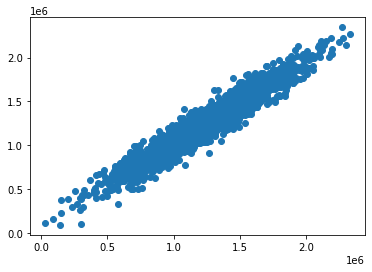

In [54]:
plt.scatter(y_test,predictions)

<AxesSubplot:xlabel='Price', ylabel='Count'>

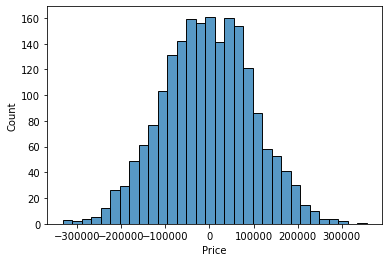

In [56]:
#residual=diff in between actual values(y_test) & predicted values
sns.histplot((y_test-predictions))

## There are 3 common evaluation metrices for regression problem
- 1 Mean Absolute Error
- 2 Mean squared Error
- 3 Root Mean squared Error

All of these are *** loss function *** , but we want to minimize them

In [61]:
from sklearn import metrics

In [62]:
metrics.mean_absolute_error(y_test,predictions)

82288.22251914957

In [64]:
metrics.mean_squared_error(y_test,predictions)

10460958907.209501

In [65]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82922291153

We were able to successfully take the data split the data into a training set and a testing set based on the features and the target.

Then we train a linear model from sykat learn fit the model check up the coefficients and the intercepts to try to learn a bit about the model and then actually make predictions using the model and analyze our residuals.

Basically our error of the model based off the test set and we can actually check out the metrics themselves.